# Logistic Regression

Logistic Regression is a statistical method for predicting binary outcomes from data.Examples of this are "yes" vs "no" or "young" vs "old". These are categories that translate to probability of being a 0 or a 1  We can calculate logistic regression by adding an activation function as the final step to our linear model. This converts the linear regression output to a probability.

In [1]:
#Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import argparse
import json
import pprint
import requests
import sys
import urllib
import os 
import numpy as np

from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode

In [2]:
#Assign database file to a variable
db_file = "../Resources/Los_Angeles/crimedata.db"

#Connect to database file
conn = sqlite3.connect(db_file)

In [3]:
#Query the la crime data table and put into a pandas dataframe
crime_df = pd.read_sql_query("select * from encoded_areaname_crimecode;", conn)

crime_df.head()

,VictimAge,AreaName_77thStreet,AreaName_Central,AreaName_Harbor,AreaName_Hollenbeck,AreaName_Hollywood,AreaName_Mission,AreaName_NHollywood,AreaName_Newton,AreaName_Northeast,...,CrimeCodeDescription_UNAUTHORIZEDCOMPUTERACCESS,CrimeCodeDescription_VANDALISM-FELONY($400&OVERALLCHURCHVANDALISMS),CrimeCodeDescription_VANDALISM-FELONY($400&OVERALLCHURCHVANDALISMS)0114,CrimeCodeDescription_VANDALISM-MISDEAMEANOR($399ORUNDER),CrimeCodeDescription_VEHICLE-ATTEMPTSTOLEN,CrimeCodeDescription_VEHICLE-STOLEN,CrimeCodeDescription_VIOLATIONOFCOURTORDER,CrimeCodeDescription_VIOLATIONOFRESTRAININGORDER,CrimeCodeDescription_VIOLATIONOFTEMPORARYRESTRAININGORDER,CrimeCodeDescription_WEAPONSPOSSESSION/BOMBING
0,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,16,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,16,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
crime_df.columns.tolist()

['VictimAge',
 'AreaName_77thStreet',
 'AreaName_Central',
 'AreaName_Harbor',
 'AreaName_Hollenbeck',
 'AreaName_Hollywood',
 'AreaName_Mission',
 'AreaName_NHollywood',
 'AreaName_Newton',
 'AreaName_Northeast',
 'AreaName_Olympic',
 'AreaName_Rampart',
 'AreaName_Southwest',
 'AreaName_Topanga',
 'AreaName_VanNuys',
 'AreaName_WestLA',
 'AreaName_WestValley',
 'AreaName_Wilshire',
 'CrimeCodeDescription_',
 'CrimeCodeDescription_ABORTION/ILLEGAL',
 'CrimeCodeDescription_ARSON',
 'CrimeCodeDescription_ASSAULTWITHDEADLYWEAPONONPOLICEOFFICER',
 'CrimeCodeDescription_ASSAULTWITHDEADLYWEAPONAGGRAVATEDASSAULT',
 'CrimeCodeDescription_ATTEMPTEDROBBERY',
 'CrimeCodeDescription_BATTERY-SIMPLEASSAULT',
 'CrimeCodeDescription_BATTERYONAFIREFIGHTER',
 'CrimeCodeDescription_BATTERYPOLICE(SIMPLE)',
 'CrimeCodeDescription_BATTERYWITHSEXUALCONTACT',
 'CrimeCodeDescription_BEASTIALITYCRIMEAGAINSTNATURESEXUALASSLTWITHANIM0065',
 'CrimeCodeDescription_BIKE-ATTEMPTEDSTOLEN',
 'CrimeCodeDescription_BIKE

In [5]:
# Most victim age crimes are commited against
ages = crime_df.VictimAge.value_counts()
ages.head(10)

17    12516
16    12093
      11503
26     4411
27     4323
25     4271
28     4179
29     4131
24     4063
30     3966
Name: VictimAge, dtype: int64

In [6]:
area_ID = crime_df.AreaName_Southwest.value_counts() 
area_ID.head()

0    148486
1     26280
Name: AreaName_Southwest, dtype: int64

In [7]:
# CrimeCodeDescription_VIOLATIONOFTEMPORARYRESTRAININGORDER
crime_desc = crime_df["CrimeCodeDescription_BATTERY-SIMPLEASSAULT"].value_counts() 
crime_desc.head()

0    157946
1     16820
Name: CrimeCodeDescription_BATTERY-SIMPLEASSAULT, dtype: int64

In [8]:
model_small_df = crime_df.loc[crime_df['CrimeCodeDescription_BATTERY-SIMPLEASSAULT'].isin(['1'])]
model_small_df.head()

,VictimAge,AreaName_77thStreet,AreaName_Central,AreaName_Harbor,AreaName_Hollenbeck,AreaName_Hollywood,AreaName_Mission,AreaName_NHollywood,AreaName_Newton,AreaName_Northeast,...,CrimeCodeDescription_UNAUTHORIZEDCOMPUTERACCESS,CrimeCodeDescription_VANDALISM-FELONY($400&OVERALLCHURCHVANDALISMS),CrimeCodeDescription_VANDALISM-FELONY($400&OVERALLCHURCHVANDALISMS)0114,CrimeCodeDescription_VANDALISM-MISDEAMEANOR($399ORUNDER),CrimeCodeDescription_VEHICLE-ATTEMPTSTOLEN,CrimeCodeDescription_VEHICLE-STOLEN,CrimeCodeDescription_VIOLATIONOFCOURTORDER,CrimeCodeDescription_VIOLATIONOFRESTRAININGORDER,CrimeCodeDescription_VIOLATIONOFTEMPORARYRESTRAININGORDER,CrimeCodeDescription_WEAPONSPOSSESSION/BOMBING
28,46,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,56,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,34,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,22,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,22,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
model_small_df.count()

VictimAge                                                                     16820
AreaName_77thStreet                                                           16820
AreaName_Central                                                              16820
AreaName_Harbor                                                               16820
AreaName_Hollenbeck                                                           16820
AreaName_Hollywood                                                            16820
AreaName_Mission                                                              16820
AreaName_NHollywood                                                           16820
AreaName_Newton                                                               16820
AreaName_Northeast                                                            16820
AreaName_Olympic                                                              16820
AreaName_Rampart                                                            

In [10]:
X= model_small_df.drop("VictimAge", axis=1)
y= model_small_df["VictimAge"]
feature_names = model_small_df.columns
print(X.shape, y.shape)

(16820, 156) (16820,)


In [11]:
crime_df['AreaName_Southwest'] = crime_df['AreaName_Southwest'].apply(pd.to_numeric, errors='coerce')
crime_df['CrimeCodeDescription_BATTERY-SIMPLEASSAULT'] = crime_df['CrimeCodeDescription_BATTERY-SIMPLEASSAULT'].apply(pd.to_numeric, errors='coerce')


X = crime_df["AreaName_Southwest"].values.reshape(-1,1)
y = crime_df["CrimeCodeDescription_BATTERY-SIMPLEASSAULT"].values.reshape(-1,1)
print(X.shape, y.shape)

(174766, 1) (174766, 1)


In [12]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(training_score)
print(testing_score)

0.00020573201554741072
0.00011127796093501896


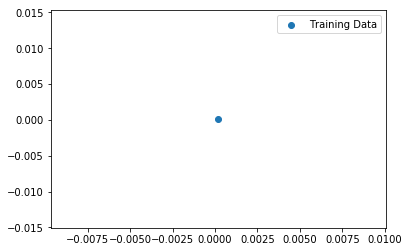

In [15]:
# Plot the Residuals for the Training and Testing data
plt.scatter(training_score, testing_score, label="Training Data")
plt.legend()